# AM207 Homework 2

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 22nd, 2018 at 11:59pm

# Name:  Christopher Buswinka

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [2]:
import numpy as np
import scipy.stats
import scipy.special
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

## Question 1: Give Me the Full Monte, Carlo Ancelotti

**Coding required**

In the quiet moments that transpire just before the sun rises that find us taking the walk of shame we can only send up quiet prayers to deities unknown that our path has not unknowingly taken us down the Boulevard of Broken Dreams (*Green Day*).  Along this road you'll find scattered the shattered hearts of formerly aspiring humorists -- the sorts of folk who might admire "the giggle at a funeral" (*Hozier*) distributed according to the function $\heartsuit(\theta) \sim \frac{ {\rm sin^{24}}\theta}{\theta^2}$ from $0< \theta< \infty$ and otherwise.  As a current aspiring humorist, it is your job to try to integrate $\heartsuit(\theta)$ in order to size up the jar you'll take with you as you go heart collecting (*Christina Perri*).  Who do you think you are anyway?

1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.

1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over the bounded domain [0, M] and get an accurate result.  What value of M should you choose to get a result within 0.001 of the exact solution?

1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?

1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?

1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times. Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.  

1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?

1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $

1.8. Based on your answer in 1.7 was your choice of M justified? 

### Answers

<div class="answer-separator">
------------------------
</div>

<h4>1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.</h4>

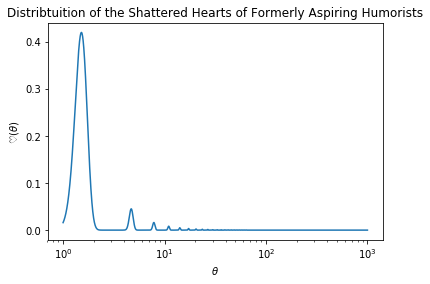

In [3]:
def hozdist(o):
    x = np.sin(o)**24 / o**2 # Create a function of the distribution
    
    return x

o = np.logspace(0,3,10000); #create a theta input vector

plt.semilogx(o,hozdist(o))  #Plotting
plt.xlabel(r'$\theta$')
plt.ylabel(r'$ \heartsuit(\theta)$')
plt.title('Distribtuition of the Shattered Hearts of Formerly Aspiring Humorists')
print('')

<div class="answer-separator">
------------------------
</div>

<h4>1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over a bounded domain and get an accurate result.  What bounds should you choose to get a result within 0.001 of the exact solution?</h4>

<div class="answer">

<br>
The distribution is a periodic function with an amplitude decaying at a rate of $\frac{1}{\theta^2}$. This decays to zero extreemly quickly, therefore we may choose any suitably large theta as our upper bound and expect a reasonably accurate answer.  In this case $10^2$ may be sufficient. 
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?</h4>

In [18]:
def simulate_heart_collection(N,upper):  #create a function for MCMC of the integral
    sims = np.random.uniform(0,upper,N) #upper is the upper bounds of the integral
    out = hozdist(sims) #hozdist is the pdf 
    sums = np.sum(out) 
    
    return sums*upper/N 

simint = simulate_heart_collection(100000,100) #run the MCMC with 100000 samples and an upper bound of 100
print('Estimated value of integral: ', simint)

Estimated value of integral:  0.25301247126497695


<div class="answer-separator">
------------------------
</div>

<h4>1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?</h4>

In [19]:
def exact_dist(n):
    x = scipy.special.binom(2*n-2,n-1) * np.pi/(2**(2*n - 1)) #evaluate the exact form of the integral
    
    return x 

In [20]:
print('The exact value of the integral is: ',exact_dist(12))
diff = abs(simint - exact_dist(12))
print('The difference between the approximated integral and actual value was within ', diff )

The exact value of the integral is:  0.26418924198235927
The difference between the approximated integral and actual value was within  0.011176770717382323


<div class="answer-separator">
------------------------
</div>

<h4>1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times.  Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.</h4>

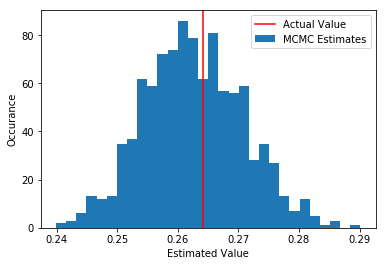

In [7]:
results = np.ones(1000)
for i in range(1000):
    results[i] = simulate_heart_collection(100000,100)  #Run the simulation 1000 times!

plt.figure()
plt.hist(results,bins=30)
plt.axvline(x=exact_dist(12),color ='r')
plt.xlabel('Estimated Value')
plt.ylabel('Occurance')
plt.legend(['Actual Value','MCMC Estimates'])

<div class="answer-separator">
------------------------
</div>

<h4>1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?</h4>

In [8]:
sem = np.std(results)/np.sqrt(1000)
percentile = np.percentile(results,[2.5,97.5]) 

print('\n\nThe standard error of the mean is: ', sem)
print('The 95 confidence intervals are: ',percentile)

if exact_dist(12) > np.min(percentile) and exact_dist(12) < np.max(percentile):
    print('The actual value of the integral is within the 95% confidence intervals!\n\n')




The standard error of the mean is:  0.0002589155142939437
The 95 confidence intervals are:  [0.24670611 0.27928671]
The actual value of the integral is within the 95% confidence intervals!




<div class="answer-separator">
------------------------
</div>

<h4>1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $
</h4>

In [21]:
def cov_hozdif(t):
    x = (1/t**2) * np.sin(1/t)**24 / ((1/t)**2)   #Create the change of variables (COV) distribution. Use 1/t transform
    return x 
 
def changeofvar(N,lower):                         #Run the MCMC on the change of variables distribtion
    sims = np.random.uniform(0,1/lower,N)         #run bound from 0 to 1/upper bound. 1/inf -> 0. 
    out = cov_hozdif(sims)
    sums = np.sum(out)
    
    return sums*(1/lower)/N

print('The integral from M to inf is: ', changeofvar(100000,100))

The integral from M to inf is:  0.001606854049063238


<div class="answer-separator">
------------------------
</div>

<h4>1.8. Based on your answer in 1.7 was your choice of M justified?
</h4>

Integral from 100 to inf mean result:  0.0016026860248210943 
STD:  9.5053409978883e-06


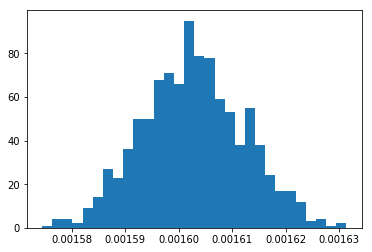

In [21]:
results = np.ones(1000)

for i in range(1000):
    results[i] = changeofvar(100000,100)     #Run the MCMC on the change of variables distribution 100 times
    
plt.figure()
plt.hist(results,bins=30)
sem = np.std(results)/np.sqrt(1000)
percentile = np.percentile(results,[2.5,97.5])
print('Integral from 100 to inf mean result: ', np.mean(results),'\nSTD: ',np.std(results))

<div class="answer">

<br>
Based on the change of varibles integral from M to inf, 100 is too small to be within .001 away from the correct answer. Running multiple itterations of MCMC from 100 to inf show that the mean value of the integral is approximately 0.0016 with a standard deviation of approximately 9.5e-06 and 95% confidence intervals of near [0.00158517, 0.00162149].  From this we can determine that 0.001 is outside the 95% confidence intervals and we can be reasonably sure that an upper bound of 100 is too large to determine the integral within 0.001 accuracy. 
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Rally to Me! 

**Some Coding required**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?  **Support your answer with full and rigorous analytic derivations.**

2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?</h4>

<div class="answer">

<br>
Let $f$ be a PDF such that $\mathbf{x}^{(i)} \overset{iid}{\sim} f$
We can then say that $\int_{A}f_XdA = 1$ where A is the dimensions of $\mathbf{x}^{(i)}$.   

We now define a specific PDF $f_X$ to be $f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}$ where $f_X = 0$ on the negative part of $\mathbb{R}^2$.  Thus we can show:    
$$
\int_{0}^{\infty}\int_{0}^{\infty} 4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1dx_2 = 1
$$
$$
=\int_{0}^{\infty}2\lambda_1 x_{2}\mathrm{exp} \left\{-\lambda_0 (x^2_{2})\right\} \int_{0}^{\infty} 2\lambda_1 x_{1} \mathrm{exp} \left\{-\lambda_0 (x^2_{1}) \right\} dx_1dx_2 = 1
$$
$$
=\int_{0}^{\infty}2\lambda_1 x_{2}\mathrm{exp} \left\{-\lambda_0 (x^2_{2})\right\}[\frac{-\lambda_1 }{\lambda_0}e^{-\lambda_0x_{1}^2} \lvert_{0}^{\infty}]dx_2 = 1
$$
$$
=\frac{\lambda_1 }{\lambda_0} \int_{0}^{\infty}2\lambda_1 x_{2}\mathrm{exp} \left\{-\lambda_0 (x^2_{2})\right\}dx_2 = 1
$$
$$
=\frac{\lambda_1 }{\lambda_0} [\frac{-\lambda_1 }{\lambda_0}e^{-\lambda_0x_{2}^2} \lvert_{0}^{\infty}] = \frac{\lambda_1 }{\lambda_0}\frac{\lambda_1 }{\lambda_0}=1
$$
$$
\frac{\lambda_1^2}{\lambda_0^2} = 1 
$$
$$
\lambda_1^2 = \lambda_0^2
$$
$$
\lambda_1 = \lambda_0
$$
We can now revise the original PDF to be
$f_X(\mathbf{x}) =  4\lambda^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda (x^2_{1} + x^2_{2}) \right\}$
     
The likelyhood of a PDF can be defined by 
$$
L(\lambda) = {\displaystyle \prod_{i=1}^{n} P(\mathbf{x}\lvert\lambda)}
$$
In this case, our PDF is increasing, thus we may maximize the likelyhood by maximizing the log-likelyhood
$$
\ell(\lambda) = {\displaystyle \sum_{i=1}^{n} ln(P(\mathbf{x}\lvert\lambda))}
$$

$\ell(\lambda)$ is maximized when $\frac{d\ell}{d\lambda} = 0$. Therefore

$$
\ell(\lambda) = \sum_{i=1}^{n} ln(4\lambda^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda (x^2_{1} + x^2_{2}) \right\})
$$
$$
\ell(\lambda) = nln(4)+nln(\lambda^2)+\sum_{i=1}^{n} ln(x_{1}x_{2}) + \sum_{i=1}^{n} -\lambda (x^2_{1} + x^2_{2})
$$
$$
\frac{d\ell}{d\lambda} = \frac{2n}{\lambda} - \sum_{i=1}^{n}  (x^2_{1} + x^2_{2}) = 0
$$
$$
 \frac{2n}{\lambda} = \sum_{i=1}^{n}  (x^2_{1} + x^2_{2} )
$$
$$
 \frac{2n}{\sum_{i=1}^{n}  (x^2_{1} + x^2_{2} )} = \hat{\lambda}_{MLE}
$$
<br>

</div>

In [11]:
def comp_mle(x,y): #x = x1, y = x2
    n = np.size(x)
    
    g = 2*n / np.sum(x**2 + y**2)   # create a function for the MLE estimaton of lambda
    
    return g

x = np.array([.5,3.2,2.72,10.047])
y = np.array([2.5,1.3,5.84,0.354])

g = comp_mle(x,y)

print('The MLE for lambda is: ', g) #calculate lambda

The MLE for lambda is:  0.049688970337392765


<div class="answer-separator">
------------------------
</div>

<h4>2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).</h4>

Text(0.5,1,'Probability of data along $\\mathbf{x}$')

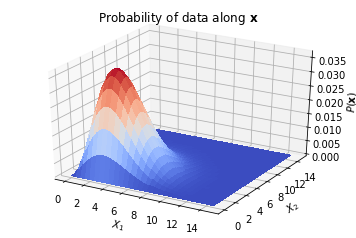

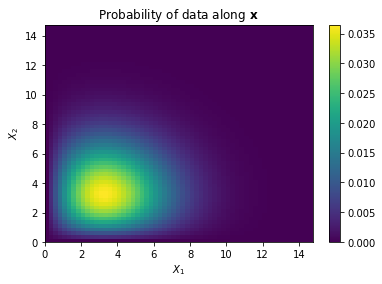

In [14]:

def ppdf(x,y,g):
    m = 4*g**2*x*y*np.exp(-g * (x**2 + y**2)) #Define a function for the pdf
    
    return m 

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 15, 0.25)
Y = np.arange(0, 15, 0.25)
X, Y = np.meshgrid(X, Y)
R = ppdf(X,Y,g)
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')
ax.set_zlabel(r'$P(\mathbf{x})$')
plt.title(r'Probability of data along $\mathbf{x}$')

surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.figure()
plt.pcolor(X,Y,R)
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')
plt.colorbar()
plt.title(r'Probability of data along $\mathbf{x}$')

<div class="answer-separator">
------------------------
</div>

## Question 3: Still Missing! 

**Coding required**

Recall from Homework 1 Question 2 that we explored working with missing data using the wine quality dataset from the UCI Machine Learning Repository.  Re-Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`. 

3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.

3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.

3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?


### Answers

In [22]:
wine_df = pd.read_csv('wine_quality_missing.csv')
data = wine_df.Ash


def meanimpute(data):
    nanind = np.isnan(data.values)   #create a mean impute function
    ind = np.logical_not(nanind)
    mean = np.mean(data.values[ind])
    data.loc[nanind] = mean
    return data


def nonpar_boot(data,N):  #create a function which runs a nonparametric bootsrap algorithm and calculates the mean and std
    mean = np.ones(N)
    std = np.ones(N)
    for i in range(N):
        newdata = data.sample(n = data.shape[0],replace=True)
        mean[i] = np.mean(newdata.values)
        std[i] = np.std(newdata.values)
    return mean, std

<h4>3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.</h4>

In [23]:
data_di = data.dropna()
nonboot_di_mean = np.mean(data_di.values)
nonboot_di_std = np.std(data_di.values)
print('For Drop Imputed: \n')
print('The mean is: ',nonboot_di_mean, '\nThe std is: ', nonboot_di_std)

For Drop Imputed: 

The mean is:  2.366217948717949 
The std is:  0.2822967681693667


<div class="answer-separator">
------------------------
</div>

<h4>3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [17]:
N = 10000
mean, std = nonpar_boot(data_di,N)

print('The SE of mean is: ', np.mean(mean)/np.sqrt(N))
print('The SE of std is: ', np.mean(std)/np.sqrt(N))

The SE of mean is:  0.02366515217948718
The SE of std is:  0.002806094780416851


<div class="answer-separator">
------------------------
</div>

<h4>3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.</h4>

In [18]:
data_mi = meanimpute(data) 
nonboot_mi_mean = np.mean(data_mi.values)
nonboot_mi_std = np.std(data_mi.values)
print('\n')
print('For Mean Imputed:\n')
print('The mean is: ',nonboot_mi_mean, '\nThe std is: ', nonboot_mi_std)




For Mean Imputed:

The mean is:  2.366217948717949 
The std is:  0.26427629172770306


/Users/chrisbuswinka/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<div class="answer-separator">
------------------------
</div>

<h4>3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [19]:
N = 10000
mean, std = nonpar_boot(data_mi,N)

print('The SE of mean is: ', np.mean(mean)/np.sqrt(N))
print('The SE of std is: ', np.mean(std)/np.sqrt(N))

The SE of mean is:  0.02366214298004898
The SE of std is:  0.002628252166988691


<div class="answer-separator">
------------------------
</div>

<h4>3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?</h4>

The standard error of the mean and STD for the mean imputed data set is slightly lower than that of the drop imputed.  This is likely due to the overrepresentation of the mean from the replaced NaN values.  The higher frequency of that value ultimately narrows the distribution and lowers the standard deviation. 

<div class="answer-separator">
------------------------
</div>